In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()
y=boston.target
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos['price']=y
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\pruth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
import statsmodels.api as sm

In [4]:
y=bos['price']
x=bos.drop(['price','INDUS','AGE'],axis=1)
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          5.54e-137
Time:                        12:40:48   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumptions 1:Normality of residuals

In [5]:
residuals=model.resid
residuals

0      -6.124281
1      -3.396528
2       4.166630
3       4.752005
4       8.217359
         ...    
501    -1.137900
502    -1.780817
503    -3.709999
504    -4.111333
505   -10.440843
Length: 506, dtype: float64

C:\Users\pruth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

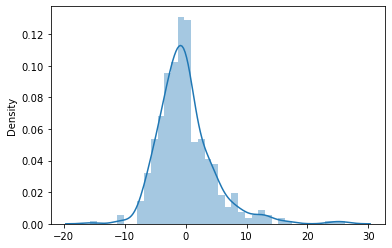

In [6]:
sns.distplot(residuals)

## Q-Q plot

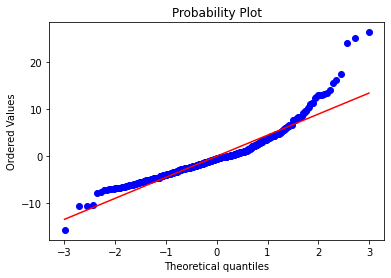

In [7]:
import scipy.stats as stats
stats.probplot(residuals,plot=plt)
plt.show()

## Test for normality

In [8]:
stats.jarque_bera(residuals)

Jarque_beraResult(statistic=787.7851418746452, pvalue=0.0)

** we will transform the target variable and see if error is normally distributed

In [9]:
lny=np.log(y)
model=sm.OLS(lny,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     168.1
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          4.31e-159
Time:                        12:40:50   Log-Likelihood:                 129.02
No. Observations:                 506   AIC:                            -234.0
Df Residuals:                     494   BIC:                            -183.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0837      0.203     20.112      0.000       3.685       4.483
CRIM          -0.0103      0.001     -7.856      0.000      -0.013      -0.008
ZN             0.0011      0.001      2.007      0.045    2.28e-05       0.002
CHAS           0.1051      0.034      3.072      0.002       0.038       0.172
NOX           -0.7217      0.142     -5.095      0.000      -1.000      -0.443
RM             0.0907      0.016      5.569      0.000       0.059       0.123
DIS           -0.0517      0.007     -6.948      0.000      -0.066      -0.037
RAD            0.0134      0.003      5.293      0.000       0.008       0.018
TAX           -0.0006      0.000     -4.129      0.000      -0.001      -0.000
PTRATIO       -0.0374      0.005     -7.237      0.000      -0.048      -0.027
B              0.0004      0.000      3.852      0.000       0.000       0.001
LSTAT         -0.0286      0.002    -15.053      0.000      -0.032      -0.025
==============================================================================
Omnibus:                       59.445   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.361
Skew:                           0.459   Prob(JB):                     4.26e-50
Kurtosis:                       6.153   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\pruth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

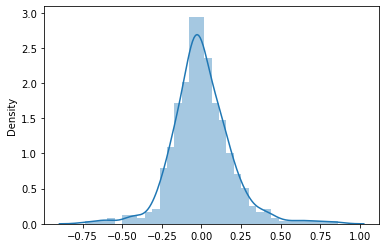

In [10]:
error=model.resid
sns.distplot(error)

In [11]:
error=model.resid

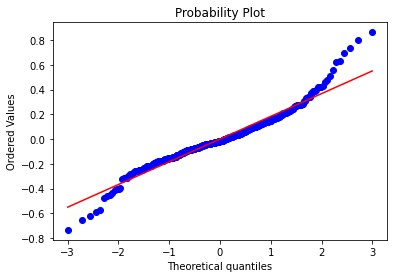

In [12]:
stats.probplot(error,plot=plt)
plt.show()

- the visual examination suggests that residuals are more normal than the previous case
-now we will do hypo.test

In [13]:
stats.jarque_bera(error)

Jarque_beraResult(statistic=227.36073522664645, pvalue=0.0)

## Assumption 2 : residuals are homosceadastic (constant variance)

In [14]:
y=bos['price']
x=bos.drop(['price','INDUS','AGE'],axis=1)
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          5.54e-137
Time:                        12:40:50   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

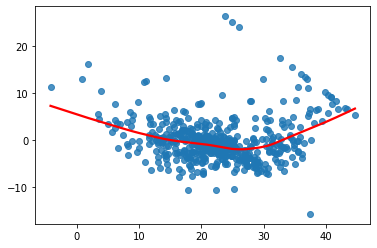

In [15]:
residuals=model.resid
y_pred=model.predict(Xc)
sns.regplot(x=y_pred,y=residuals,lowess=True,line_kws={'color':'red'})
plt.show()

change in variance of residuals are tested against the red line(overall trend )
it shows some indication of increasing variance

## Goldfeld quant test

In [16]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(y=residuals,x=Xc)

(2.2836707086343955, 1.345412663053935e-10, 'increasing')

In [ ]:
H0 : variance of residuals is constant
H1 : variance of residuals is not constant

since prob.value 1.345412663053935e-10, is less than 0.05 we will reject H0 and conclude
variance is not constant

the term 'increasing' indicates that procedure is assuming increasing variance with y_est

## Assumption 3 : No autocorelation among residuals

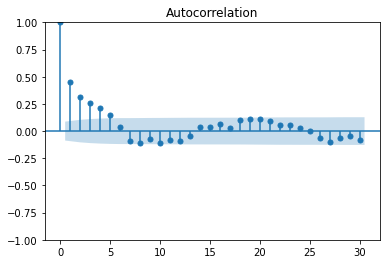

In [17]:
import statsmodels.tsa.api as smt
residuals=model.resid
smt.graphics.plot_acf(residuals,lags=30)
plt.show()

In [18]:
dw = sm.stats.stattools.durbin_watson(model.resid)
dw

1.0778750022758068

Durbin-Watson: value is 1.078 ,
we expect Durbin-Watson value around 2 in the case of no autocorelation
1.078  indicates weak autocorelation

## Assumption 4 : no multicolinearity among independent variables

<AxesSubplot:>

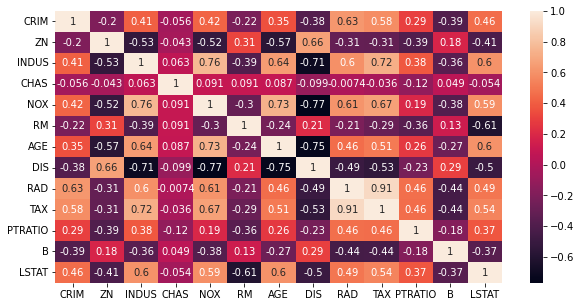

In [19]:
x2=bos.drop(['price'],axis=1)
plt.figure(figsize=(10,5))
sns.heatmap(x2.corr(),annot=True)


## variation inflation factor

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [21]:
x2c=sm.add_constant(x2)# it is very important to add constant or else r2 will be bloated and we get wrong VIF values
vif=[VIF(x2c.values,i)for i in range(x2c.shape[1])]
pd.DataFrame(vif,index=x2c.columns,columns=['VIF'])

,VIF
const,585.265238
CRIM,1.792192
ZN,2.298758
INDUS,3.991596
CHAS,1.073995
NOX,4.393720
RM,1.933744
AGE,3.100826
DIS,3.955945
RAD,7.484496


## Assumption 5 : Linearity of the relationship

note: this assumption checks whether the model is appropriate given the data(it is not checking if the model is linear or not)v 

In [22]:
y=bos['price']
x=bos.drop(['price','INDUS','AGE'],axis=1)
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()


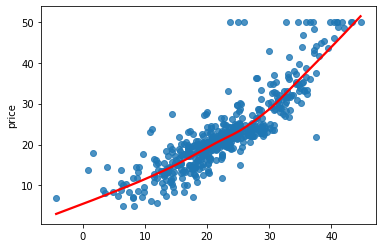

In [23]:
y_est=model.predict(Xc)
sns.regplot(x=y_est,y=y,lowess=True,line_kws={'color':'red'})
plt.show()

Note: if the model is appropriate we expect to see linear relationship b/w y & y_est
      fig shows that the relationship is not exactly linear which suggest that model requires improvement

In [24]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model)

(0.5781612495333303, 0.9999908142705343)

In [ ]:
H0 : fit of model using full sample=fit of model using central subset
H1 : fit of model using full sample is worse compared to fit of model using central subset

sice probability 0.99 is higher than 0.05 we will accept the H0 to conclude that model is appropriate 